# Running the 1D Delta-Eddington Sea Ice Radiative Transfer Model: SeaIceRT

SeaIceRT is a python interface for CESM3 Delta Eddington radiative transfer for sea ice. The radiative transfer code is written in Fortran 77. The python wrapper allows the sea ice parameters to be set, the code run and output returned.

A full description of the code can be found in 

Briegleb, B. P., & Light, B. (2007). A Delta-Eddington Mutiple Scattering Parameterization for Solar Radiation in the Sea Ice Component of the Community Climate System Model (No. NCAR/TN-472+STR). University Corporation for Atmospheric Research. doi:10.5065/D6B27S71

The following notebook describes how to run the model, change parameter values, retrieve results and also how to run for multiple points.

In [1]:
# Append path for package
import sys
sys.path.append("../seaicert/")

## Running the model
The model is run using the `SeaIceRT` class, which contained in the `ccsm_sir_de` package.

In [2]:
import numpy as np

from ccsm3_sir_de import SeaIceRT

A model instance is created

In [3]:
model = SeaIceRT()

The initial model instance has a default parameterisation.  Model parameters are accessed with the `get_parameters` method.

__This should probably be changed to `print_parameters`__

In [4]:
model.get_parameters()

day_of_year = 140.477
latitude = 80.0
level = [18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
pressure = [2.0, 5.0, 15.0, 35.0, 60.0, 105.0, 160.0, 235.0, 320.0, 420.0, 520.0, 610.0, 710.0, 800.0, 870.0, 930.0, 970.0, 1000.0]
air_temperature = [273.0, 251.0, 234.0, 226.0, 225.0, 225.0, 225.0, 225.0, 234.0, 247.0, 257.0, 265.0, 272.0, 277.0, 280.0, 281.0, 278.0, 276.0]
water_vapor_mixing_ratio = [4e-06, 4e-06, 4e-06, 4e-06, 4e-06, 4e-06, 6.4e-06, 2.6e-05, 0.00012, 0.00052, 0.0011, 0.002, 0.0031, 0.0042, 0.0051, 0.0059, 0.004, 0.003]
ozone_mixing_ratio = [7e-06, 1.3e-05, 1e-05, 5.5e-06, 4.2e-06, 2.2e-06, 1e-06, 5e-07, 2e-07, 1.4e-07, 1e-07, 8e-08, 7e-08, 6e-08, 5.5e-08, 5e-08, 4.5e-08, 4e-08]
cloud_cover = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
cloud_liquid_water_path = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 60.0, 0.0, 0.0]
surface_pressure = 1008.0

Parameter descriptions are in the model docstring

In [5]:
help(model)

Help on SeaIceRT in module ccsm3_sir_de object:

class SeaIceRT(builtins.object)
 |  Main class for running CCSM3_SIR_DE
 |  
 |  Model Parameters
 |  ----------------
 |  
 |  Spatio-temporal parameters:
 |  
 |  :day_of_year: day of year, 1..365, where day 1 = January 1
 |  :latitude: latitude (-90 to 90)  (test=80.)
 |  
 |  Surface characteristics:
 |  :surface_pressure:  Surface pressure in mb (test=1008 mb)
 |  :co2_volume_mixing_ratio:  CO2 volume mixing ratio (test 3.7e-04)
 |  :surface_air_temperature:  Surface air temperature (K) (test=273.16 K)
 |  :ground_temperature:  Surface skin temperature (K) (test=273.17 K)
 |  :snow_depth:  Physical snow depth in meters (test=0 m)
 |  :snow_density:  Snow density (kg/m3) (test=330 kg/m3)
 |  :snow_grain_radius:  Snow grain radius in microns (um) (test=50. um)
 |  :pond_depth:  Physical pond depth in meters (test=0.5 m)
 |  :pond_tuning_parameter:  Pond tuning parameter in standard deviations (test=-1.)
 |  :sea_ice_thickness:  Physic

The model is run by invoking the `run` method

In [6]:
model.run()

Results are printed using `print_results`

In [7]:
model.sea_ice_thickness = 0.5
model.get_parameters()
model.run()

day_of_year = 140.477
latitude = 80.0
level = [18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
pressure = [2.0, 5.0, 15.0, 35.0, 60.0, 105.0, 160.0, 235.0, 320.0, 420.0, 520.0, 610.0, 710.0, 800.0, 870.0, 930.0, 970.0, 1000.0]
air_temperature = [273.0, 251.0, 234.0, 226.0, 225.0, 225.0, 225.0, 225.0, 234.0, 247.0, 257.0, 265.0, 272.0, 277.0, 280.0, 281.0, 278.0, 276.0]
water_vapor_mixing_ratio = [4e-06, 4e-06, 4e-06, 4e-06, 4e-06, 4e-06, 6.4e-06, 2.6e-05, 0.00012, 0.00052, 0.0011, 0.002, 0.0031, 0.0042, 0.0051, 0.0059, 0.004, 0.003]
ozone_mixing_ratio = [7e-06, 1.3e-05, 1e-05, 5.5e-06, 4.2e-06, 2.2e-06, 1e-06, 5e-07, 2e-07, 1.4e-07, 1e-07, 8e-08, 7e-08, 6e-08, 5.5e-08, 5e-08, 4.5e-08, 4e-08]
cloud_cover = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
cloud_liquid_water_path = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 60.0, 0.0, 0.0]
surface_pressure = 1008.0

In [8]:
model.day_of_year = 243.
model.run()

In [9]:
model.print_results()

----------------------------------------------------------------------
CCSM3 Sea Ice Delta Eddington calculation
----------------------------------------------------------------------
----------------------------------------------------------------------
Visible and near-ir direct and diffuse albedos
   Visible: 0.2 to 0.7 micrometers
   Near-IR: 0.7 to 5.0 micrometers
----------------------------------------------------------------------
Albedo shortwave direct: 0.00
Albedo shortwave diffuse: 0.00
Albedo longwave direct: 0.00
Albedo longwave diffuse: 0.00
 
----------------------------------------------------------------------
Surface ansorption and Albedos
----------------------------------------------------------------------
Visible solar absorbed by ocean: 0.0
Near-IR absorbed by ocean: 0.0
----------------------------------------------------------------------
Surface absorption ad albedos
----------------------------------------------------------------------
Solar vs direct surfac

The `get_results` method returns a dictionary of output parameters that can be accessed using normal python dictionary methods.    

In [10]:
output = model.get_results()
[out_param for out_param in output.keys()]

['surface_direct_shortwave_reflectance',
 'surface_diffuse_shortwave_reflectance',
 'surface_direct_longwave_reflectance',
 'surface_diffuse_longwave_reflectance',
 'downwelling_shortwave_flux_absorbed_by_ocean',
 'downwelling_longwave_flux_absorbed_by_ocean',
 'downwelling_shortwave_flux_absorbed_by_seaice_layer',
 'downwelling_longwave_flux_absorbed_by_seaice_layer',
 'downwelling_radiative_flux_absorbed_by_seaice_layer',
 'surface_downwelling_direct_shortwave_flux',
 'surface_downwelling_diffuse_shortwave_flux',
 'fraction_of_direct_shortwave_at_surface',
 'surface_downwelling_direct_longwave_flux',
 'surface_downwelling_diffuse_longwave_flux',
 'fraction_of_direct_longwave_at_surface',
 'surface_downwelling_radiative_flux',
 'fraction_of_downwelling_radiative_flux_as_shortwave',
 'surface_albedo',
 'downwelling_shortwave_absorbed_by_seaice',
 'downwelling_longwave_absorbed_seaice',
 'downwelling_radiative_flux_absorbed_by_seaice_surface_layer',
 'seaice_layer_type',
 'fraction_of_s

In [11]:
output["fraction_of_surface_shortwave_flux_transmitted_to_layer"]

[nan, nan, nan, nan, nan, nan, nan, nan]

In [12]:
output["fraction_of_surface_shortwave_flux_transmitted_to_ocean"]

nan

## Modifying input parameters

Input parameters are modified by changing model attributes.  In this case we can change pond depth to 0 m.

In [13]:
model.pond_depth = 0.
model.run()
model.print_results()

----------------------------------------------------------------------
CCSM3 Sea Ice Delta Eddington calculation
----------------------------------------------------------------------
----------------------------------------------------------------------
Visible and near-ir direct and diffuse albedos
   Visible: 0.2 to 0.7 micrometers
   Near-IR: 0.7 to 5.0 micrometers
----------------------------------------------------------------------
Albedo shortwave direct: 0.00
Albedo shortwave diffuse: 0.00
Albedo longwave direct: 0.00
Albedo longwave diffuse: 0.00
 
----------------------------------------------------------------------
Surface ansorption and Albedos
----------------------------------------------------------------------
Visible solar absorbed by ocean: 0.0
Near-IR absorbed by ocean: 0.0
----------------------------------------------------------------------
Surface absorption ad albedos
----------------------------------------------------------------------
Solar vs direct surfac

Likewise, change snow depth.

In [14]:
model.snow_depth = 0.3
model.run()
model.print_results()

----------------------------------------------------------------------
CCSM3 Sea Ice Delta Eddington calculation
----------------------------------------------------------------------
----------------------------------------------------------------------
Visible and near-ir direct and diffuse albedos
   Visible: 0.2 to 0.7 micrometers
   Near-IR: 0.7 to 5.0 micrometers
----------------------------------------------------------------------
Albedo shortwave direct: 0.00
Albedo shortwave diffuse: 0.00
Albedo longwave direct: 0.00
Albedo longwave diffuse: 0.00
 
----------------------------------------------------------------------
Surface ansorption and Albedos
----------------------------------------------------------------------
Visible solar absorbed by ocean: 0.0
Near-IR absorbed by ocean: 0.0
----------------------------------------------------------------------
Surface absorption ad albedos
----------------------------------------------------------------------
Solar vs direct surfac

## Running for Polarstern MOSAiC drift



In [15]:
import pandas as pd

In [16]:
df = pd.read_csv("../data/rt_snow_input.csv", index_col=0, header=0, parse_dates=True)
df

,Depth,Density,Latitude,Longitude
Date,,,,
2019-10-05 12:00:00,0.163416,301.51227,85.100302,133.732597
2019-10-06 12:00:00,0.162295,303.89825,85.102400,133.862478
2019-10-07 12:00:00,0.152856,322.05740,85.067720,134.627573
2019-10-08 12:00:00,0.151041,335.22607,84.956227,136.223353
2019-10-09 12:00:00,0.156001,326.82974,84.902838,135.902912
...,...,...,...,...
2020-07-27 12:00:00,0.000000,0.00000,79.582463,-2.310762
2020-07-28 12:00:00,0.000000,0.00000,79.353650,-2.687590
2020-07-29 12:00:00,0.000000,0.00000,79.184568,-2.593293


In [17]:
%%time

model.snow_grain_radius = 180.

timestamp = []
sw_absorbed_by_ocean = []
surface_albedo = []
surface_downwelling_radiative_flux = []
for idx, vals in df.iterrows():
    model.day_of_year = idx.day_of_year + 0.5  # adjust for longitude?
    model.latitude = vals["Latitude"]
    model.snow_depth = vals["Depth"]
    model.snow_density = vals["Density"]
    model.run()
    output = model.get_results()
    timestamp.append(idx)
    sw_absorbed_by_ocean.append(output["downwelling_shortwave_flux_absorbed_by_ocean"])
    surface_albedo.append(output["surface_albedo"])
    surface_downwelling_radiative_flux.append(output["surface_downwelling_radiative_flux"])
    
#df.index.day_of_year[0]

CPU times: user 298 ms, sys: 13.5 ms, total: 311 ms
Wall time: 310 ms


Text(0.01, 0.01, 'Snow Density')

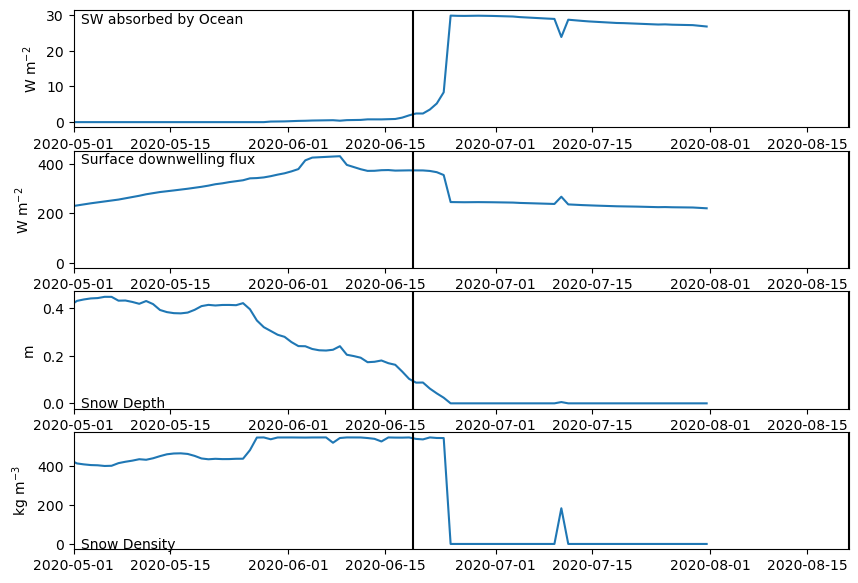

In [32]:
import matplotlib.pyplot as plt
import datetime as dt

start_co2 = dt.datetime(2020, 6, 19)
start_co3 = dt.datetime(2020, 8, 21)

t0 = dt.datetime(2020, 5, 1)
t1 = start_co3

fig, ax = plt.subplots(4, 1, figsize=(10,7))
ax[0].set_xlim(t0, t1)
ax[0].plot(timestamp, sw_absorbed_by_ocean)
ax[0].axvline(start_co2, color='k')
ax[0].axvline(start_co3, color='k')
ax[0].set_ylabel("$\mathrm{W\ m^{-2}}$")
ax[0].text(0.01, 0.89, "SW absorbed by Ocean", transform=ax[0].transAxes)

ax[1].set_xlim(t0, t1)
ax[1].plot(timestamp, surface_downwelling_radiative_flux)
ax[1].axvline(start_co2, color='k')
ax[1].axvline(start_co3, color='k')
ax[1].set_ylabel("$\mathrm{W\ m^{-2}}$")
ax[1].text(0.01, 0.89, "Surface downwelling flux", transform=ax[1].transAxes)

ax[2].set_xlim(t0, t1)
ax[2].plot(df.index, df.Depth)
ax[2].axvline(start_co2, color='k')
ax[2].axvline(start_co3, color='k')
ax[2].set_ylabel("m")
ax[2].text(0.01, 0.01, "Snow Depth", transform=ax[2].transAxes)

ax[3].set_xlim(t0, t1)
ax[3].plot(df.index, df.Density)
ax[3].axvline(start_co2, color='k')
ax[3].axvline(start_co3, color='k')
ax[3].set_ylabel("$\mathrm{kg\ m^{-3}}$")
ax[3].text(0.01, 0.01, "Snow Density", transform=ax[3].transAxes)


## Sensitivity Studies

### Pond depth

Explore sensitivity of total absorbed radiation by the ocean to pond depth for a set of ice thicknesses 

In [19]:
import itertools
pond_depth = np.arange(0., 0.32, 0.02)
ice_thickness = np.arange(0.5, 2.5, 0.5)

model.set_default_parameters()

results = []
for i, p in itertools.product(ice_thickness, pond_depth):
    model.pond_depth = p
    model.ice_thickness = i
    model.run()
    output = model.get_results()
    total_radiation_absorbed_by_ocean = (output['downwelling_shortwave_flux_absorbed_by_ocean'] + 
                                         output['downwelling_longwave_flux_absorbed_by_ocean'])
    results.append((p, i, total_radiation_absorbed_by_ocean))
    
results

[(0.0, 0.5, 8.12743854522705),
 (0.02, 0.5, 16.59345245361328),
 (0.04, 0.5, 17.405590057373047),
 (0.06, 0.5, 18.36372184753418),
 (0.08, 0.5, 19.493074417114258),
 (0.1, 0.5, 20.82499885559082),
 (0.12, 0.5, 22.400968551635742),
 (0.14, 0.5, 24.274370193481445),
 (0.16, 0.5, 26.515689849853516),
 (0.18, 0.5, 29.235553741455078),
 (0.2, 0.5, 32.69268798828125),
 (0.22, 0.5, 32.29844284057617),
 (0.24, 0.5, 31.9128360748291),
 (0.26, 0.5, 31.535539627075195),
 (0.28, 0.5, 31.166303634643555),
 (0.3, 0.5, 30.80481719970703),
 (0.0, 1.0, 8.12743854522705),
 (0.02, 1.0, 16.59345245361328),
 (0.04, 1.0, 17.405590057373047),
 (0.06, 1.0, 18.36372184753418),
 (0.08, 1.0, 19.493074417114258),
 (0.1, 1.0, 20.82499885559082),
 (0.12, 1.0, 22.400968551635742),
 (0.14, 1.0, 24.274370193481445),
 (0.16, 1.0, 26.515689849853516),
 (0.18, 1.0, 29.235553741455078),
 (0.2, 1.0, 32.69268798828125),
 (0.22, 1.0, 32.29844284057617),
 (0.24, 1.0, 31.9128360748291),
 (0.26, 1.0, 31.535539627075195),
 (0.28

In [20]:
model.snow_grain_radius

50.0